<a href="https://colab.research.google.com/github/dr-mushtaq/Machine-Learning/blob/master/Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

nsupervised machine learning algorithms, such as clusters analysis or clustering, group unlabeled datasets.[1]

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Chapter:1: Partitioning methods**</p>

## **Kmean Clustering**

Clustering is the process of combining data points in a dataset so that there is a high level of similarity between clusters and a low level of similarity between clusters. Clustering, in its most basic form, is the process of forming subsets or groups from a dataset made up of data points that are really similar to one another and which can be differentiated from each other significantly.[1]


**Why Clustering?**

Consider a dataset about which we know nothing. The result of a clustering algorithm is that it can find groups of objects whose average distance between members or data points is smaller than the distance between members or data points in other clusters[1]

**Application of Clusteriing**

Here are a few real-life examples of how clustering can be applied:[1]
- Customer segmentation: The process of identifying a group of customers with similar behaviour given a large dataset.
- In a network traffic classification, the characteristics of the traffic sources are grouped together. Using clusters, it is easy to classify traffic types.
-Email Filter: This filter divides the data into three sections and then classifies them accordingly.

## **K means clustering**

This algorithm identifies clusters of a given data set based on a certain number of predetermined groupings or “K” groups[1].

The k-means clustering algorithm is used to group unlabelled data into different clusters or subgroups using an unsupervised approach. Surely you must be wondering what the works ‘k’ and ‘means’ in the k-means clustering mean?[1]

To put a stop to all your guesses here, the term ‘k’ stands for the number of clusters that can be created in the process of clustering. For instance, k = 2, we’ll have two clusters, whereas when k=3, we’ll have three clusters, and so on. Due to the fact that k-means clustering uses centroid-based algorithm, the “means” of each cluster is determined by the centroid of the data points. In the working explanation of k-means you will learn about the concept of centroid based algorithm[1]

### **Import necessary libraries**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### **Data Loading**

In [ ]:
iris = load_iris()
X = iris.data  # features: sepal length, sepal width, petal length, petal width

In [ ]:
import pandas as pd
Train_data = pd.read_csv('/content/drive/MyDrive/Datasets/Student field Recommendation /Placement_Data_Full_Class.csv',encoding = 'latin')

### **Model Training**

**Setting up K-Means**


Now that we have our random data, let's set up our

K-Means Clustering.
The KMeans class has many parameters that can be used, but we will be using these three:

- **init:** Initialization method of the centroids.
  - Value will be: "k-means++"
   - **k-means++:** Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
- **n_clusters:** The number of clusters to form as well as the number of centroids to generate.
   - Value will be: 4 (since we have 4 centers)
- **n_init:** Number of time the k-means algorithm will be run with different centroid seeds.
The final results will be the best output of n_init consecutive runs in terms of inertia.
    - Value will be: 12

**Step 2: Create and fit the KMeans model with 3 clusters**

In [ ]:

kmeans = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
kmeans.fit(X)

KMeans(n_clusters=4, n_init=12)

**Step 3: Get cluster labels for each sample**

In [ ]:
labels = kmeans.labels_
print("Cluster labels for training data:", labels[:10])  # show first 10

Cluster labels for training data: [1 1 1 1 1 1 1 1 1 1]


**This assigns each flower sample to one of the three clusters.**

We will also get the coordinates of the cluster centers using KMeans' .cluster_centers_ and save it as k_means_cluster_centers



In [ ]:
k_means_cluster_centers = kmeans.cluster_centers_
k_means_cluster_centers

array([[5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [6.2525    , 2.855     , 4.815     , 1.625     ]])

### **Model performance**

In [ ]:
print(model.inertia_)

57.25600931571815


How spread out the samples within each cluster are can be measured by the "inertia". Intuitively, inertia measures how far samples are from their centroids. You can find the precise definition in the scikit-learn documentation. We want clusters that are not spread out, so lower values of the inertia are better. The inertia of a kmeans model is measured automatically when any of the fit methods are called, and is available afterwards as the inertia attribute. In fact, kmeans aims to place the clusters in a way that minimizes the inertia.

### **Predicting Clusters for New Samples**

One great thing about K-Means is that once the model has found the cluster centroids, it can classify new, unseen samples.

In [ ]:
# Example: New iris samples
new_samples = [[5.0, 3.2, 1.2, 0.2],
               [6.5, 3.0, 5.2, 2.0]]

# Predict which clusters they belong to
new_labels = kmeans.predict(new_samples)
print("Cluster labels for new samples:", new_labels)


Cluster labels for new samples: [1 0]


The model simply checks which cluster centroid is closest and assigns the new sample accordingly.

###**Find optimum number of clusters(The Elbow Method)**

Sometimes we don’t know how many clusters to choose. The elbow method helps find the optimum k by plotting the inertia (a measure of clustering quality) for different cluster numbers.

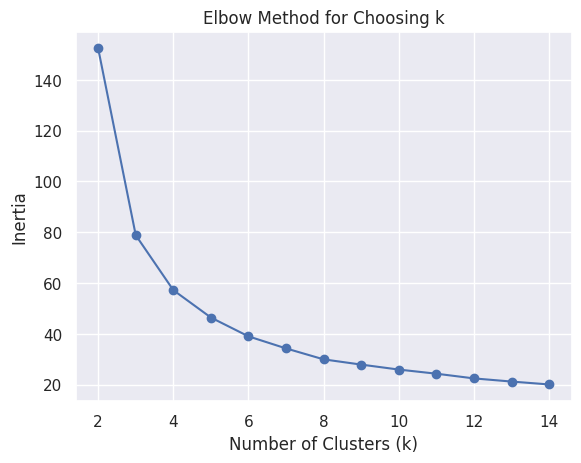

In [ ]:
# Step 1: Try different numbers of clusters
cluster_range = range(2, 15)
inertias = []

for c in cluster_range:
    kmeans = KMeans(n_clusters=c, init='k-means++', n_init=100, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Step 2: Plot inertia vs. number of clusters
plt.plot(cluster_range, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Choosing k")
plt.show()


👉 Look for the “elbow point” in the graph, where inertia starts decreasing more slowly. That’s usually a good choice for k.

### **Visualizing Clusters with Scatter Plots**

Visualizations help us understand clustering results. Let’s plot sepal length vs petal length, with colors representing clusters:

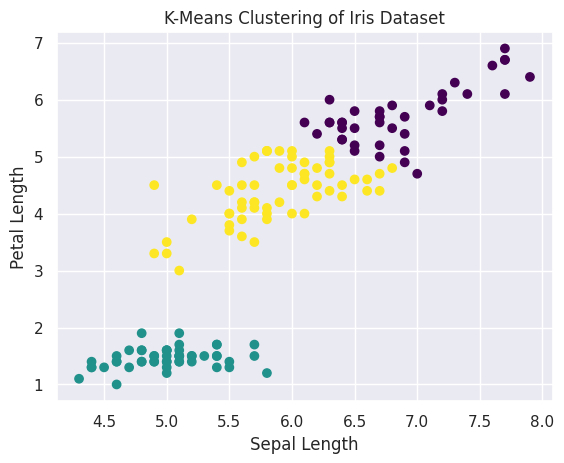

In [ ]:
# Scatter plot of clusters
plt.scatter(X[:, 0], X[:, 2], c=labels, cmap='viridis')
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("K-Means Clustering of Iris Dataset")
plt.show()


✅ Each dot represents a flower sample. The color shows which cluster it belongs to.

### **Evaluating a clustering**

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(X)
print(model.inertia_)

57.25600931571815


### **Summary**

Partitioning methods, such as K-Means clustering, are unsupervised machine learning algorithms that group unlabeled datasets. The goal is to form clusters where data points within a cluster are similar to each other and different from points in other clusters. This approach can be applied to various tasks like customer segmentation, network traffic classification, and email filtering.

## **K-Medoids**

### **Import necessary libraries**

In [ ]:
!pip install scikit-learn-extra

In [ ]:
!pip install "numpy<2"

In [ ]:
# Install scikit-learn-extra if not available
# !pip install scikit-learn-extra

from sklearn.datasets import load_iris
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import pandas as pd

### **Data Loading**

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # features: sepal length, sepal width, petal length, petal width

### **Model Training**

In [ ]:
# Apply K-Medoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=42, metric='euclidean')
kmedoids.fit(X)

KMedoids(n_clusters=3, random_state=42)

### **Predicting Clusters for New Samples**

In [ ]:
# Predicted labels and medoids
labels = kmedoids.labels_
medoids = kmedoids.medoid_indices_

### **Evaluating a clustering**

In [ ]:
# Evaluate clustering performance
score = silhouette_score(X, labels)

In [ ]:
# Combine dataset with cluster labels for display
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['Cluster'] = labels

print(iris_df.head())
print(f"Silhouette Score: {score:.2f}")
print(f"Medoid indices: {medoids}")

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  
Silhouette Score: 0.52
Medoid indices: [147  99   7]


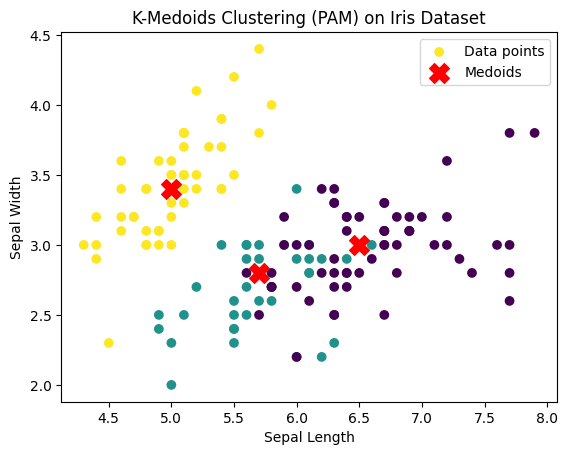

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', label='Data points')
plt.scatter(X[medoids, 0], X[medoids, 1], c='red', marker='X', s=200, label='Medoids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Medoids Clustering (PAM) on Iris Dataset')
plt.legend()
plt.show()


**💬 What’s Happening in This Code**

We cluster the Iris dataset into 3 groups.

The KMedoids algorithm identifies representative samples (medoids).

We compute the Silhouette Score to evaluate cluster quality.

The output shows the first few samples and the computed medoid indices.

## **CLARANS**

In [2]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 39.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp312-cp312-linux_x86_64.whl size=2177961 sha256=ae405a8a8c05d604734e38bcf32bae3a4a4458ebabdad66bc0c792b61e25bbab
  Stored in directory: /root/.cache/pip/wheels/17/4d/c3/c6d5d563c1bf8146d059d63be3678abc2f2801fba0aaf5f0b8
Successfully built scikit-learn-extra


In [ ]:
!pip install "numpy<2"

In [3]:
# Example: Simple K-Medoids clustering (similar to CLARANS idea)

from sklearn.datasets import make_blobs
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

In [5]:
# Generate sample data (built-in dataset)
X, _ = make_blobs(n_samples=500, centers=4, random_state=42)

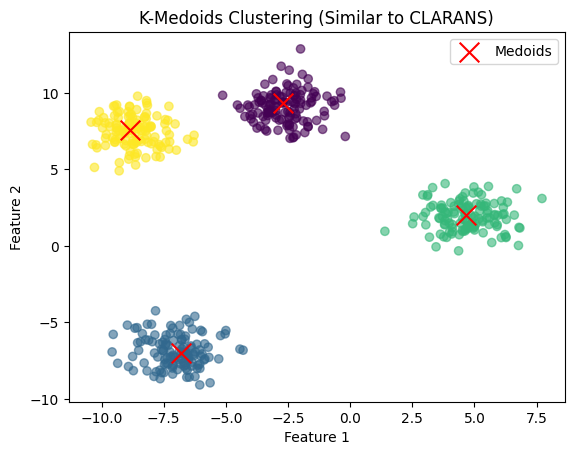

In [6]:
# Apply K-Medoids (a medoid-based clustering similar to CLARANS)
kmedoids = KMedoids(n_clusters=4, random_state=0).fit(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=kmedoids.labels_, cmap='viridis', alpha=0.6)
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1],
            color='red', marker='x', s=200, label='Medoids')
plt.title('K-Medoids Clustering (Similar to CLARANS)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


## **DBSCAN Clustering**

### **Import Library**

Partitioning methods (like K-Means) and hierarchical methods (like Agglomerative and Divisive clustering) are two main types of clustering algorithms, and they differ primarily in how they structure the clusters:

- **Partitioning Methods:** These algorithms divide the dataset into a pre-defined number of clusters (k). Each data point belongs to only one cluster. The goal is to minimize the within-cluster variance.
- **Hierarchical Methods:** These algorithms create a hierarchy of clusters, often visualized as a dendrogram. They can be either *agglomerative* (starting with individual data points and merging them into clusters) or *divisive* (starting with one large cluster and splitting it). Hierarchical methods do not require specifying the number of clusters beforehand, and they allow for exploring clustering at different levels of granularity.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### **Data Preprocessing**

**Find Missing Data**

In [ ]:
cluster_data.isnull().sum()

In [ ]:
data = data.drop('CUST_ID', axis=1)
data.fillna(data.mean(), inplace=True)

**scale and normalize the dataset**

In [ ]:
# scaling and normalizing the dataset
scaler = StandardScaler()
x_scaled = scaler.fit_transform(cluster_data)
from sklearn.preprocessing import normalize
x_normal = normalize(x_scaled)
x_normal = pd.DataFrame(x_normal)

**Principal Component Analysis (PCA)**

Now I will implement the Principal Component Analysis (PCA) algorithm in machine learning to reduce the dimensionality of the data for visualization:

In [ ]:
# reduce the dimensionality of the dataset
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_normal)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['V1', 'V2']
print(x_principal.head())

         V1        V2
0  0.088253 -0.229349
1 -0.751777 -0.182983
2 -0.008200  0.762539
3  0.746365 -0.156298
4 -0.486665  0.372023


### **Elbow Method**

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3,min_samples=4)

In [ ]:
# Fitting the model
model=dbscan.fit(x_normal)
labels=model.labels_
print(labels)

In [ ]:
#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool)
sample_cores[dbscan.core_sample_indices_]=True

In [ ]:
#Calculating the number of clusters
n_clusters=len(set(labels))- (1 if -1 in labels else 0)
print(n_clusters)

### **Model Training**

Now let’s implement the DBSCAN algorithm and have a look at the data and the clusters after implementing it:

In [ ]:
dbscan = DBSCAN(eps=0.036, min_samples=4).fit(x_principal)
labels = dbscan.labels_
data['cluster'] = dbscan.labels_
print(data.tail())

     sl_no  gender  ssc_p  ssc_b  ...  mba_p  status    salary  cluster
210    211       1   80.6      1  ...  74.49       1  400000.0       -1
211    212       1   58.0      1  ...  53.62       1  275000.0       -1
212    213       1   67.0      1  ...  69.72       1  295000.0       -1
213    214       0   74.0      1  ...  60.23       1  204000.0       -1
214    215       1   62.0      0  ...  60.22       0       NaN        4

[5 rows x 16 columns]


### **Scatter plot**

In [ ]:

clusterColor = {0: u'yellow', 1: u'green', 2: 'blue', -1: u'red'}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(12, 10))
plt.scatter(x_principal['V1'], x_principal['V2'], c=colors)
plt.title("Implementation of DBSCAN Clustering", fontname="Times New Roman",fontweight="bold")
plt.show()

KeyError: ignored

## **Agglomerative Clustering**

### **Import library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### **Data Preprocessing**

Here we can make clusters based on the Degree passing mars and student filed of the students. So let’s prepare the data accordingly:

In [ ]:
Train_data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,cluster
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0,-1
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,-1
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0,-1
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,NaN,0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0,-1
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0,-1
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0,-1
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0,-1


In [ ]:
Train_data["degree_p"] = Train_data[["degree_p"]]
Train_data["specialisation"] = Train_data[["specialisation"]]
Train_data = Train_data[["degree_p", "specialisation"]]
print(Train_data.head())

### **Model training**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering()
model.fit(Train_data)
pred = model.fit_predict(Train_data)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
plt.scatter(Train_data["degree_p"], Train_data["specialisation"], c=pred, cmap='rainbow', alpha=0.9)
plt.show()

## **BIRCH Clustering**

### **Model Training**

In [ ]:
from sklearn.cluster import Birch
model = Birch(branching_factor=30, n_clusters=5, threshold=2.5)
model.fit(Train_data)
pred = model.predict(Train_data)
plt.scatter(Train_data["degree_p"], Train_data["specialisation"], c=pred, cmap='rainbow', alpha=0.5, edgecolors='b')
plt.show()

### **Mean Shift Clustering**

### **Model Training**

In [ ]:
from sklearn.cluster import MeanShift
model = MeanShift(bandwidth=2)
model.fit(Train_data)
pred = model.fit_predict(Train_data)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
plt.scatter(Train_data["degree_p"], Train_data["specialisation"], c=pred, cmap='rainbow', alpha=0.9)
plt.show()

## **t-SNE**

### **Import library**

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

### **Data Preprocessing**

In [ ]:
selected_cols=["gender","ssc_p","ssc_b","hsc_p","hsc_b","hsc_s","degree_p","degree_t","workex","etest_p","mba_p","status","salary"]
cluster_data=MiceImputed.loc[:,selected_cols]

In [ ]:
MiceImputed

### **Model Training**

In [ ]:

tsne = TSNE(n_components=2, perplexity=20, random_state=1000)
projections = tsne.fit_transform(cluster_data)

fig = px.scatter(
    projections, x=0, y=1,
    color=MiceImputed.specialisation, labels={'color': 'specialisation'}
)
fig.show()

## **Hierarchical Clustering**

follows two approaches Divisive and Agglomerative. Each observation is considered a cluster and similar data points are grouped until they are fused, while Divisive works in the opposite direction[1]

### **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **Data Preprocessing**

In [ ]:
np.unique(MiceImputed.specialisation,return_counts=True)


In [ ]:
# Import the whiten function
from scipy.cluster.vq import whiten
scaled_data = whiten(MiceImputed.to_numpy())


In [ ]:
pd.DataFrame(scaled_data).describe()

In [ ]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage
# Use the linkage() function
distance_matrix = linkage(scaled_data, method = 'ward', metric = 'euclidean')

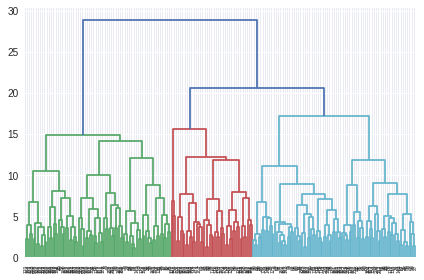

In [ ]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram
# Create a dendrogram
dn = dendrogram(distance_matrix)
# Display the dendogram
plt.show()

In [ ]:
# Assign cluster labels
MiceImputed['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

In [ ]:
MiceImputed

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,cluster_labels
0,1.0,1.0,67.00,1.0,91.00,1.0,1.0,58.00,2.0,0.0,55.0,1.0,58.80,1.0,270000.000000,3
1,2.0,1.0,79.33,0.0,78.33,1.0,2.0,77.48,2.0,1.0,86.5,0.0,66.28,1.0,200000.000000,2
2,3.0,1.0,65.00,0.0,68.00,0.0,0.0,64.00,0.0,0.0,75.0,0.0,57.80,1.0,250000.000000,3
3,4.0,1.0,56.00,0.0,52.00,0.0,2.0,52.00,2.0,0.0,66.0,1.0,59.43,0.0,288655.133065,1
4,5.0,1.0,85.80,0.0,73.60,0.0,1.0,73.30,0.0,0.0,96.8,0.0,55.50,1.0,425000.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,1.0,80.60,1.0,82.00,1.0,1.0,77.60,0.0,0.0,91.0,0.0,74.49,1.0,400000.000000,3
211,212.0,1.0,58.00,1.0,60.00,1.0,2.0,72.00,2.0,0.0,74.0,0.0,53.62,1.0,275000.000000,1
212,213.0,1.0,67.00,1.0,67.00,1.0,1.0,73.00,0.0,1.0,59.0,0.0,69.72,1.0,295000.000000,3
213,214.0,0.0,74.00,1.0,66.00,1.0,1.0,58.00,0.0,0.0,70.0,1.0,60.23,1.0,204000.000000,1


In [ ]:
MiceImputed['target'] = MiceImputed.specialisation
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(MiceImputed[0], MiceImputed[1], c=MiceImputed['target'])
axes[1].scatter(MiceImputed[0], MiceImputed[1], c=MiceImputed['cluster_labels'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Hierarchical', fontsize=18)

### **Model Training**

In [ ]:
#using the dendrogram and determine the number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x_normal, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
#create the model to fit the hierarchical means clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean",
                             linkage = 'ward')
hc_pred = hc.fit_predict(x_normal)

In [ ]:
#visualizing the clusters
plt.scatter(x_normal[hc_pred==0,0], x_normal[hc_pred==0,1], s = 100, c = 'red',
                                              label ='Cluster1')
plt.scatter(x_normal[hc_pred==1,0], x_normal[hc_pred==1,1], s = 100, c = 'blue',
                                              label ='Cluster2')
plt.scatter(x_normal[hc_pred==2,0], x_normal[yhc_pred==2,1], s = 100, c = 'green',
                                            label = 'Cluster3')
plt.scatter(x_normal[hc_pred==3,0], x_normal[hc_pred==3,1], s = 100, c = 'cyan',
                                             label ='Cluster4')
plt.scatter(x_normal[hc_pred==4,0], x_normal[hc_pred==4,1], s = 100, c =
                                    'magenta',label = 'Cluster5')
plt.title('Clusters of the customers')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending SCore (1 - 100)')
plt.legend()
plt.show()

### **Evaluating a clustering**

## **Fuzzy C means Clustering**

Although the workings of the FCM algorithm are almost identical to those of the K-means clustering algorithm, the main difference is that a data point can be placed in more than one cluster.[1]

## **Density-Based Spatial Clustering:**

Suitable for application requiring non-linear structures for clustering, solely based on density.[1]

Thanks for completing this lesson!

**Author:** Dr Mushtaq Hussain


# **References**

[1-Detailed Introduction To K-Means Clustering In Python](https://usernamejack.medium.com/detailed-introduction-to-k-means-clustering-in-python-d8178d7eb123)

[2-K-Means Clustering in Machine Learning](https://thecleverprogrammer.com/2021/02/16/k-means-clustering-in-machine-learning/)

[3-DBSCAN Clustering in Machine Learning](https://thecleverprogrammer.com/2021/02/03/dbscan-clustering-in-machine-learning/)

[4-Agglomerative Clustering using Python](https://thecleverprogrammer.com/2021/08/11/agglomerative-clustering-in-machine-learning/)

[5- BIRCH Clustering in Machine Learning](https://thecleverprogrammer.com/2021/03/15/birch-clustering-in-machine-learning/)

[6-Mean Shift Clustering in Machine Learning](https://thecleverprogrammer.com/2021/09/29/mean-shift-clustering-in-machine-learning/)

[7-Hierarchical Clustering in Python](https://medium.com/swlh/hierarchical-clustering-in-python-9646cfddee35)

[8-Fully Explained DBScan Clustering Algorithm with Python](https://pub.towardsai.net/fully-explained-dbscan-clustering-algorithm-with-python-a568139ebff5)

[9-Fully Explained Hierarchical Clustering with Python](https://pub.towardsai.net/fully-explained-hierarchical-clustering-with-python-ebb256317b50)

[10-Clustering-And-Dimensionality-Reduction---Deep-Dive](https://github.com/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive)

[11-DIY Clustering algorithms and models](https://github.com/DataTalksClub/project-of-the-week/blob/main/2022-08-31-clustering.md)